In [1]:
import torch
import math
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
import scipy.stats
from tqdm import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [2]:
from nn_resampler import nn_resampler
from phase_est_smc import phase_est_smc

In [3]:
net = nn_resampler(100,100)
#net = net.to(device)
net.load_state_dict(torch.load("net_bn_aft_relu.model"))
net.eval()

nn_resampler(
  (enc1): Linear(in_features=100, out_features=50, bias=True)
  (enc2): Linear(in_features=50, out_features=25, bias=True)
  (enc3): Linear(in_features=25, out_features=10, bias=True)
  (dec1): Linear(in_features=10, out_features=25, bias=True)
  (dec2): Linear(in_features=25, out_features=50, bias=True)
  (dec3): Linear(in_features=50, out_features=100, bias=True)
  (bn_enc1): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn_enc2): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn_enc3): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn_dec1): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn_dec2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [4]:
num_particles = 100 # number of SMC particles (num of w points)
num_samples = 10000 # number of samples to draw from the particle distribution (to be binned)
num_bins = 100 # number of bins
n_iters = 100 # number of iterations of resampling

## NN Resampler

In [5]:
# omega_star_list = []
# nn_pred_list = []

# for i in range(n_iters): 
#     t0 = 0.1
#     omega_star = np.random.uniform() * 2 * np.pi
#     omega_star_list.append(omega_star)
#     smc = phase_est_smc(omega_star, t0)
#     smc.init_particles(num_particles)
#     running_est = []

#     while True:

#         particle_pos, particle_wgts = smc.particles(threshold=num_particles/5, num_measurements=1)
#         data = np.random.choice(particle_pos, size = num_samples, p=particle_wgts)
#         mean = np.mean(data)
#         std = np.std(data)
#         data = (data-mean)/std
#         bins, edges = np.histogram(data, num_bins)
#         bins = bins/num_samples

#         nn_pred = net(torch.tensor(bins).float().unsqueeze(0)) ## convert to float tensor, then make dim [1, num_bins]

#         smc.nn_resample(nn_pred.detach().numpy(), edges, mean, std)

#     #     edges_ = edges[:-1]
#     #     edge_width = edges_[1] - edges_[0]

#     #     plt.bar(edges_*std + mean, bins, align='edge', width = edge_width)
#     #     plt.bar(edges_*std + mean, nn_pred[0].detach().numpy(), align='edge', width = edge_width, alpha=0.7)
#     #     plt.show() 
#         curr_omega_est = smc.particle_pos[np.argmax(smc.particle_wgts)]
#         running_est.append(curr_omega_est)
        
#         if len(running_est) > 10:
#             last_10 = running_est[-10:]
#             # np.allclose(a,b) returns true if every element in a and b are equal to a tolerance
#             # np.full_like makes an array with shake of last_10 with every element being last_10[0]
#             # if all elements of last_10 are equal then they should all equal the first element
#             if np.allclose(last_10, np.full_like(last_10, last_10[0])):
#                 break
                
#     print("True omega: {:f}, prediction by SMC: {:f}".format(omega_star,curr_omega_est))
#     nn_pred_list.append(curr_omega_est)


In [6]:
# nn_mse = np.mean( (np.array(omega_star_list) - np.array(nn_pred_list))**2 )
# print(nn_mse)

## Liu-West resampler

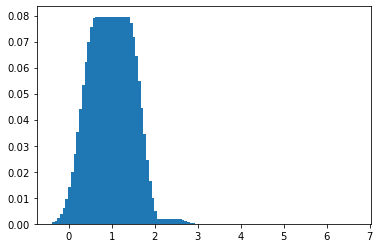

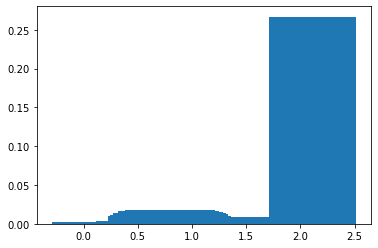

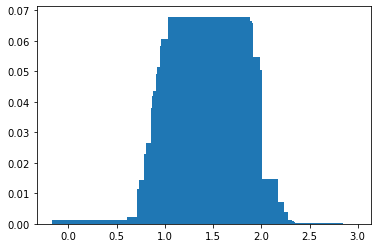

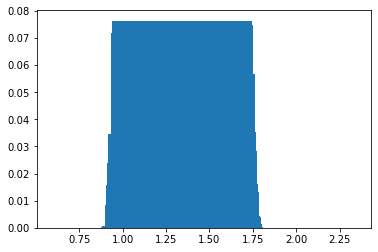

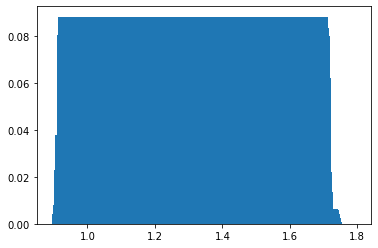

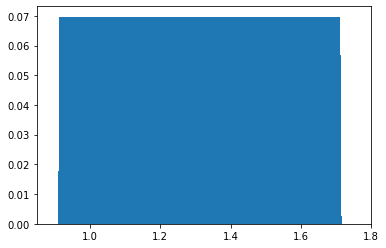

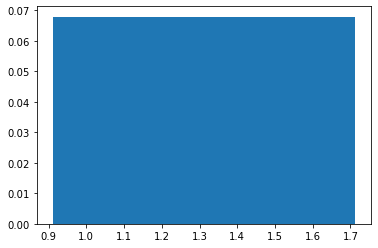

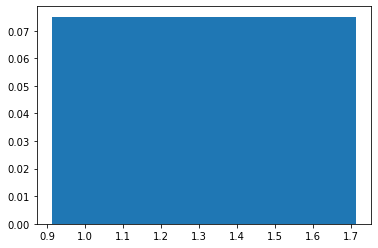

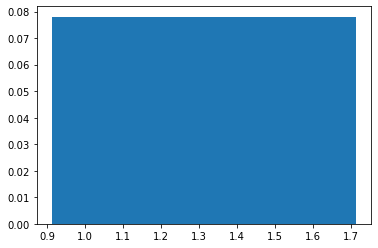

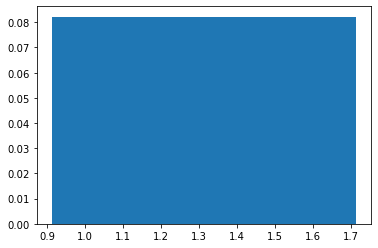

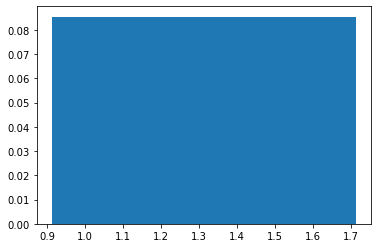

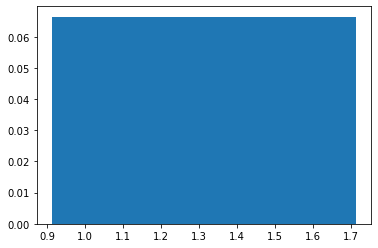

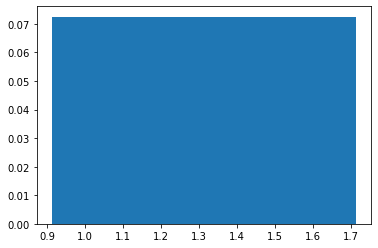

C:\Users\alvin\research\phase_est_smc.py:110: RuntimeWarning: invalid value encountered in sqrt
  new_particle_pos[i] = np.random.normal(loc=mu_i, scale=np.sqrt(var))  ## scale is standard deviation


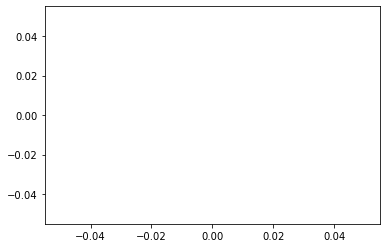

ValueError: probabilities contain NaN

In [7]:
omega_star_list = []
lw_pred_list = []

for i in range(n_iters): 
    t0 = 0.1
    omega_star = np.random.uniform() * 2 * np.pi
    omega_star_list.append(omega_star)
    smc = phase_est_smc(omega_star, t0)
    smc.init_particles(num_particles)
    running_est = []

    while True:

        smc.particles(threshold=num_particles/5, num_measurements=1)
        plt.bar(smc.particle_pos, smc.particle_wgts)
        plt.show()
        smc.liu_west_resample()
        curr_omega_est = smc.particle_pos[np.argmax(smc.particle_wgts)]
        running_est.append(curr_omega_est)
    
        
        if len(running_est) > 10:
            last_10 = running_est[-10:]
            # np.allclose(a,b) returns true if every element in a and b are equal to a tolerance
            # np.full_like makes an array with shake of last_10 with every element being last_10[0]
            # if all elements of last_10 are equal then they should all equal the first element
            if np.allclose(last_10, np.full_like(last_10, last_10[0])):
                break
                
    print("True omega: {:f}, prediction by LW: {:f}".format(omega_star,curr_omega_est))
    lw_pred_list.append(curr_omega_est)

In [ ]:
lw_mse = np.mean( (np.array(omega_star_list) - np.array(lw_pred_list))**2 )
print(lw_mse)